<a href="https://colab.research.google.com/github/selcuk-yalcin/TrustworthyML/blob/main/Holdout_Set_Evaluation_Score_Estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [ ]:
# Step 1: Split Data → Train, Validation, Test
X, y = load_iris(return_X_y=True)
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.25, random_state=42)

In [ ]:
# Step 2: Try different hyperparameter values (n_neighbors)
hyperparams = list(range(1, 21))
val_scores = []
models = []

for k in hyperparams:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    models.append(model)

    # Step 3: Evaluate on validation set
    y_val_pred = model.predict(X_val)
    acc = accuracy_score(y_val, y_val_pred)
    val_scores.append(acc)


In [ ]:
# Step 3 continued: Choose best model
best_idx = np.argmax(val_scores)
best_k = hyperparams[best_idx]
print(f"Step 3 → Best n_neighbors: {best_k}, Validation Accuracy: {val_scores[best_idx]:.4f}")


Step 3 → Best max_depth: 2, Validation Accuracy: 0.9333


In [ ]:
# Step 4: Retrain on train+val with best k
final_model = KNeighborsClassifier(n_neighbors=best_k)
final_model.fit(X_trainval, y_trainval)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [ ]:
# Step 5: Evaluate on test set
y_test_pred = final_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Step 5 → Test Accuracy (Hold-out set): {test_accuracy:.4f}")

Step 5 → Test Accuracy (Hold-out set): 0.9667


In [ ]:
# Step 6: Final model is ready
print("Step 6 → Final KNN model trained with best n_neighbors and full training data is ready.")

Step 6 → Final model trained with best hyperparameter and full training data is ready for deployment.


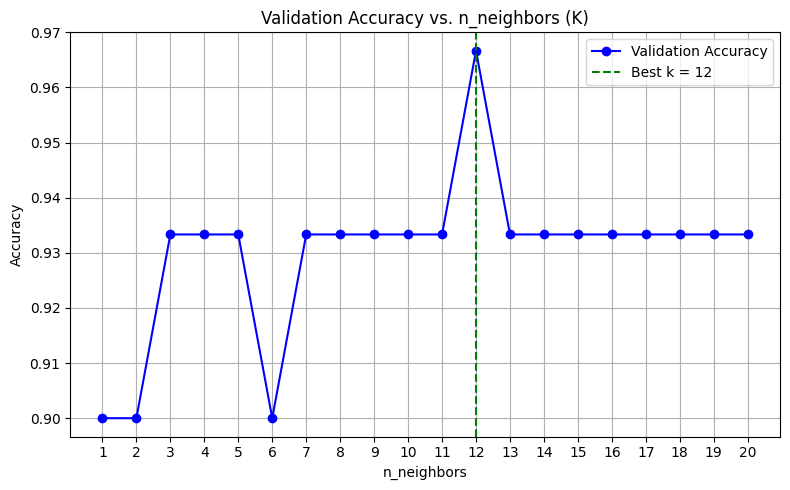

In [ ]:
# 🔍 Plot validation accuracy vs k
plt.figure(figsize=(8, 5))
plt.plot(hyperparams, val_scores, marker='o', linestyle='-', color='blue', label='Validation Accuracy')
plt.axvline(best_k, color='green', linestyle='--', label=f'Best k = {best_k}')
plt.title('Validation Accuracy vs. n_neighbors (K)')
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.xticks(hyperparams)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()